# Exploration of chemical properties 

In [1]:
from collections import Counter

import pandas as pd
import numpy as np
import rdkit
from rdkit.Chem import inchi
from rdkit.Chem import Descriptors
from rdkit.Chem import Descriptors3D
from rdkit.Chem import AllChem
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set()

In [3]:
df_train = pd.read_csv('../data/train_labels.csv')

In [4]:
df_train.head()

,image_id,InChI
0,000011a64c74,InChI=1S/C13H20OS/c1-9(2)8-15-13-6-5-10(3)7-12...
1,000019cc0cd2,InChI=1S/C21H30O4/c1-12(22)25-14-6-8-20(2)13(1...
2,0000252b6d2b,InChI=1S/C24H23N5O4/c1-14-13-15(7-8-17(14)28-1...
3,000026b49b7e,InChI=1S/C17H24N2O4S/c1-12(20)18-13(14-7-6-10-...
4,000026fc6c36,InChI=1S/C10H19N3O2S/c1-15-10(14)12-8-4-6-13(7...


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2424186 entries, 0 to 2424185
Data columns (total 2 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   image_id  object
 1   InChI     object
dtypes: object(2)
memory usage: 37.0+ MB


In [6]:
N_SAMPLE = 10_000

In [7]:
if N_SAMPLE is not None:
    df_train = df_train.sample(n=N_SAMPLE)

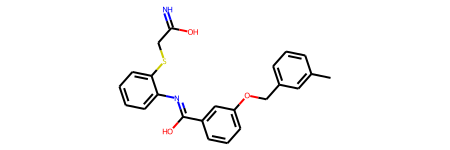

In [8]:
inchi.MolFromInchi(df_train['InChI'].iloc[0])

In [9]:
mols = [inchi.MolFromInchi(inchi_str, removeHs=False) for inchi_str in tqdm(df_train['InChI'])]

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:22<00:00, 447.38it/s]


In [10]:
atom_counter = Counter()
for mol in mols:
    syms = [atom.GetSymbol() for atom in mol.GetAtoms()]
    atom_counter.update(syms)

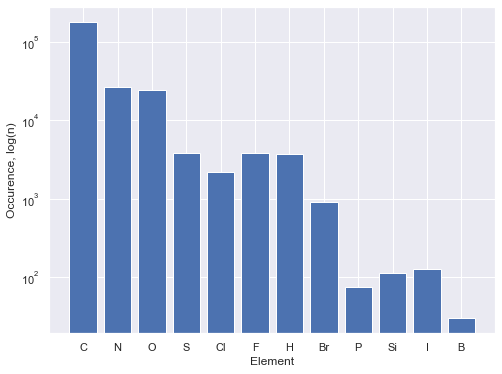

In [11]:
x, y = zip(*atom_counter.items())
plt.figure(figsize=(8, 6))
plt.bar(np.arange(len(x)), y, log=True)
plt.xticks(np.arange(len(x)), x)
plt.xlabel('Element')
plt.ylabel('Occurence, log(n)')
plt.show()

In [12]:
btype_counter = Counter()
for mol in mols:
    btypes = [bond.GetBondType() for bond in mol.GetBonds()]
    btype_counter.update(btypes)

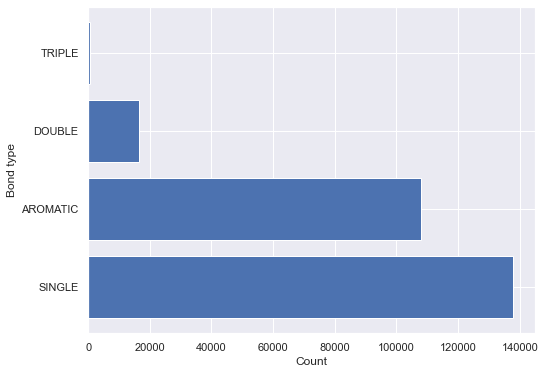

In [13]:
x, y = zip(*btype_counter.items())
x = list(map(str, x))
plt.figure(figsize=(8, 6))
plt.barh(np.arange(len(x)), y)
plt.yticks(np.arange(len(x)), x)
plt.ylabel('Bond type')
plt.xlabel('Count')
plt.show()

In [14]:
atom_counts = [len(mol.GetAtoms()) for mol in mols]

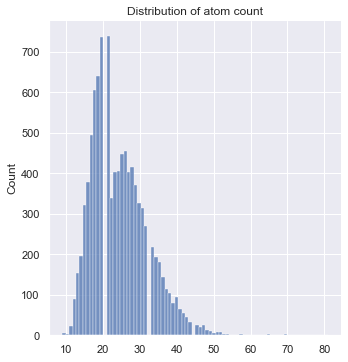

In [15]:
sns.displot(x=atom_counts)
plt.title('Distribution of atom count')
plt.show()

In [16]:
bond_counts = [len(mol.GetBonds()) for mol in mols]

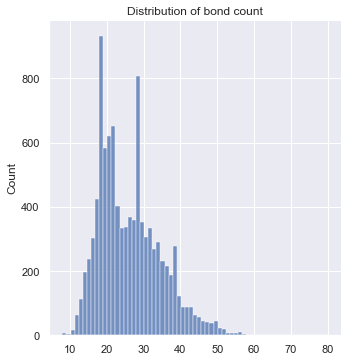

In [17]:
sns.displot(x=bond_counts)
plt.title('Distribution of bond count')
plt.show()

Generate 3D conformations of molecules and try to measure "how mush 3D they are" with 3D descriptors like spherocity index:

In [18]:
for mol in tqdm(mols):
    AllChem.EmbedMolecule(mol)

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [12:31<00:00, 13.31it/s]


In [19]:
def plot_descriptor_dist(mols, descriptor, dname):
    x = [descriptor(mol) for mol in mols if mol.GetNumConformers() >= 1]
    sns.displot(x=x)
    plt.title(f'{dname} distribution')
    plt.show()

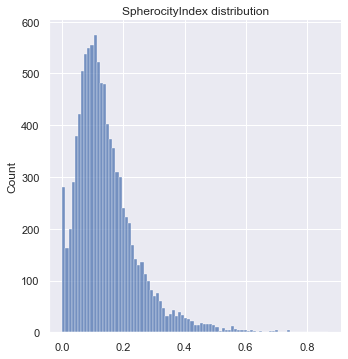

In [20]:
plot_descriptor_dist(mols, Descriptors3D.SpherocityIndex, 'SpherocityIndex')

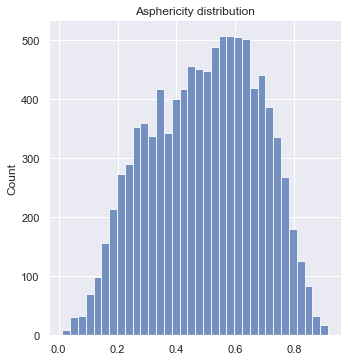

In [21]:
plot_descriptor_dist(mols, Descriptors3D.Asphericity, 'Asphericity')

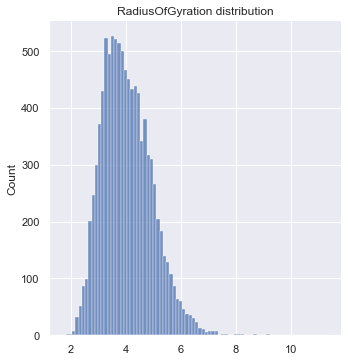

In [22]:
plot_descriptor_dist(mols, Descriptors3D.RadiusOfGyration, 'RadiusOfGyration')